# Work in progress

In [98]:
import sqlite3 as sqlite
import pandas as pd
import matplotlib.pyplot as plt

## First database developer_survey

In [125]:
developer_survey = pd.read_csv('dbs/developer_survey/survey_results.csv')
developer_survey.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or software engineering",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or software engineering",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or software engineering",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no longer am",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or software engineering",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [126]:
conn_sql = sqlite.connect('MasterAll.db')
developer_survey.to_sql('developer_survey', con=conn_sql, if_exists='replace', index=False)

developer_survey = pd.read_sql('SELECT * FROM developer_survey', conn_sql)
developer_survey.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or software engineering",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,None,NaN,NaN,United Kingdom,Pound sterling,...,None,None,None,"Computer science, computer engineering, or software engineering",None,None,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,None,NaN,NaN,Russian Federation,None,...,Neither easy nor difficult,Appropriate in length,None,None,None,None,Somewhat more welcome now than last year,NaN,4,None
3,4,I am a developer by profession,Yes,25.0,18,None,NaN,NaN,Albania,Albanian lek,...,None,None,No,"Computer science, computer engineering, or software engineering",None,None,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no longer am",Yes,31.0,16,None,NaN,NaN,United States,None,...,Easy,Too short,No,"Computer science, computer engineering, or software engineering",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [127]:
conn_sql.commit()

In [128]:
cur = conn_sql.cursor()
cur.execute('Select distinct MainBranch from developer_survey')
cur.fetchall()

[('I am a developer by profession',),
 ('I code primarily as a hobby',),
 ('I used to be a developer by profession, but no longer am',),
 ('I am not primarily a developer, but I write code sometimes as part of my work',),
 ('I am a student who is learning to code',),
 (None,)]

In [129]:
#shape and dimension of dataframe developer_survey
print('Shape: ', developer_survey.shape)
print('Dimensions: ', developer_survey.ndim)

Shape:  (64461, 61)
Dimensions:  2


In [130]:
#checking types of data contained in dataframe
developer_survey.dtypes

Respondent              int64
MainBranch             object
Hobbyist               object
Age                   float64
Age1stCode             object
                       ...   
WebframeWorkedWith     object
WelcomeChange          object
WorkWeekHrs           float64
YearsCode              object
YearsCodePro           object
Length: 61, dtype: object

In [131]:
#we want to predict job satisfaction and job seek hence we will drop some unecessary columns
developer_survey.drop(['Respondent', 'CompFreq', 'CompTotal', 'Country', 'CurrencyDesc', 
    'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith', 'Ethnicity', 'LanguageDesireNextYear', 
    'LanguageWorkedWith', 'MiscTechDesireNextYear', 'MiscTechWorkedWith', 'NEWCollabToolsDesireNextYear', 
    'NEWCollabToolsWorkedWith', 'NEWOffTopic', 
    'NEWOtherComms', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites', 'NEWStuck', 'PlatformDesireNextYear', 
    'PlatformWorkedWith', 'Sexuality', 'SOAccount', 'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 
    'SurveyLength', 'Trans', 'WebframeDesireNextYear', 'WebframeWorkedWith', 'WelcomeChange'], axis = 1, inplace = True)

developer_survey.head()

,MainBranch,Hobbyist,Age,Age1stCode,ConvertedComp,DevType,EdLevel,Employment,Gender,JobFactors,...,NEWLearn,NEWOnboardGood,NEWOvertime,OpSys,OrgSize,PurchaseWhat,UndergradMajor,WorkWeekHrs,YearsCode,YearsCodePro
0,I am a developer by profession,Yes,NaN,13,NaN,"Developer, desktop or enterprise applications;Developer, full-stack","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-employed",Man,"Languages, frameworks, and other technologies I’d be working with;Remote work options;Opportunit...",...,Once a year,None,Often: 1-2 days per week or more,Windows,2 to 9 employees,None,"Computer science, computer engineering, or software engineering",50.0,36,27
1,I am a developer by profession,No,NaN,19,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,None,None,...,Once a year,None,None,MacOS,"1,000 to 4,999 employees",I have little or no influence,"Computer science, computer engineering, or software engineering",NaN,7,4
2,I code primarily as a hobby,Yes,NaN,15,NaN,None,None,None,None,None,...,Once a decade,None,None,Linux-based,None,None,None,NaN,4,None
3,I am a developer by profession,Yes,25.0,18,NaN,None,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",None,Man,Flex time or a flexible schedule;Office environment or company culture;Opportunities for profess...,...,Once a year,Yes,Occasionally: 1-2 days per quarter but less than monthly,Linux-based,20 to 99 employees,I have a great deal of influence,"Computer science, computer engineering, or software engineering",40.0,7,4
4,"I used to be a developer by profession, but no longer am",Yes,31.0,16,NaN,None,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Man,None,...,Once a year,None,None,Windows,None,None,"Computer science, computer engineering, or software engineering",NaN,15,8


In [132]:
developer_survey.dtypes

MainBranch             object
Hobbyist               object
Age                   float64
Age1stCode             object
ConvertedComp         float64
DevType                object
EdLevel                object
Employment             object
Gender                 object
JobFactors             object
JobSat                 object
JobSeek                object
NEWDevOps              object
NEWDevOpsImpt          object
NEWEdImpt              object
NEWJobHunt             object
NEWJobHuntResearch     object
NEWLearn               object
NEWOnboardGood         object
NEWOvertime            object
OpSys                  object
OrgSize                object
PurchaseWhat           object
UndergradMajor         object
WorkWeekHrs           float64
YearsCode              object
YearsCodePro           object
dtype: object

In [133]:
replace_nums = {'YearsCode': {'Less than 1 year': 0, 'More than 50 years': 51},
                'YearsCodePro': {'Less than 1 year': 0, 'More than 50 years': 51},
               'Age1stCode': {'Older than 85': 86, 'Younger than 5 years': 4}}
developer_survey = developer_survey.replace(replace_nums)
developer_survey.head()

,MainBranch,Hobbyist,Age,Age1stCode,ConvertedComp,DevType,EdLevel,Employment,Gender,JobFactors,...,NEWLearn,NEWOnboardGood,NEWOvertime,OpSys,OrgSize,PurchaseWhat,UndergradMajor,WorkWeekHrs,YearsCode,YearsCodePro
0,I am a developer by profession,Yes,NaN,13,NaN,"Developer, desktop or enterprise applications;Developer, full-stack","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-employed",Man,"Languages, frameworks, and other technologies I’d be working with;Remote work options;Opportunit...",...,Once a year,None,Often: 1-2 days per week or more,Windows,2 to 9 employees,None,"Computer science, computer engineering, or software engineering",50.0,36,27
1,I am a developer by profession,No,NaN,19,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,None,None,...,Once a year,None,None,MacOS,"1,000 to 4,999 employees",I have little or no influence,"Computer science, computer engineering, or software engineering",NaN,7,4
2,I code primarily as a hobby,Yes,NaN,15,NaN,None,None,None,None,None,...,Once a decade,None,None,Linux-based,None,None,None,NaN,4,None
3,I am a developer by profession,Yes,25.0,18,NaN,None,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",None,Man,Flex time or a flexible schedule;Office environment or company culture;Opportunities for profess...,...,Once a year,Yes,Occasionally: 1-2 days per quarter but less than monthly,Linux-based,20 to 99 employees,I have a great deal of influence,"Computer science, computer engineering, or software engineering",40.0,7,4
4,"I used to be a developer by profession, but no longer am",Yes,31.0,16,NaN,None,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Man,None,...,Once a year,None,None,Windows,None,None,"Computer science, computer engineering, or software engineering",NaN,15,8


In [134]:
#we change to numeric immediately YearsCode as it now contains only numbers; other object types we'll have to use LabelEncoder
developer_survey['YearsCode'] = pd.to_numeric(developer_survey['YearsCode'])
developer_survey['YearsCodePro'] = pd.to_numeric(developer_survey['YearsCodePro'])
developer_survey['Age1stCode'] = pd.to_numeric(developer_survey['Age1stCode'])
developer_survey.dtypes

MainBranch             object
Hobbyist               object
Age                   float64
Age1stCode            float64
ConvertedComp         float64
DevType                object
EdLevel                object
Employment             object
Gender                 object
JobFactors             object
JobSat                 object
JobSeek                object
NEWDevOps              object
NEWDevOpsImpt          object
NEWEdImpt              object
NEWJobHunt             object
NEWJobHuntResearch     object
NEWLearn               object
NEWOnboardGood         object
NEWOvertime            object
OpSys                  object
OrgSize                object
PurchaseWhat           object
UndergradMajor         object
WorkWeekHrs           float64
YearsCode             float64
YearsCodePro          float64
dtype: object

In [135]:
#check if any column has missing/nan values

developer_survey[developer_survey.isnull().any(axis=1)]

,MainBranch,Hobbyist,Age,Age1stCode,ConvertedComp,DevType,EdLevel,Employment,Gender,JobFactors,...,NEWLearn,NEWOnboardGood,NEWOvertime,OpSys,OrgSize,PurchaseWhat,UndergradMajor,WorkWeekHrs,YearsCode,YearsCodePro
0,I am a developer by profession,Yes,NaN,13.0,NaN,"Developer, desktop or enterprise applications;Developer, full-stack","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-employed",Man,"Languages, frameworks, and other technologies I’d be working with;Remote work options;Opportunit...",...,Once a year,None,Often: 1-2 days per week or more,Windows,2 to 9 employees,None,"Computer science, computer engineering, or software engineering",50.0,36.0,27.0
1,I am a developer by profession,No,NaN,19.0,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,None,None,...,Once a year,None,None,MacOS,"1,000 to 4,999 employees",I have little or no influence,"Computer science, computer engineering, or software engineering",NaN,7.0,4.0
2,I code primarily as a hobby,Yes,NaN,15.0,NaN,None,None,None,None,None,...,Once a decade,None,None,Linux-based,None,None,None,NaN,4.0,NaN
3,I am a developer by profession,Yes,25.0,18.0,NaN,None,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",None,Man,Flex time or a flexible schedule;Office environment or company culture;Opportunities for profess...,...,Once a year,Yes,Occasionally: 1-2 days per quarter but less than monthly,Linux-based,20 to 99 employees,I have a great deal of influence,"Computer science, computer engineering, or software engineering",40.0,7.0,4.0
4,"I used to be a developer by profession, but no longer am",Yes,31.0,16.0,NaN,None,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Man,None,...,Once a year,None,None,Windows,None,None,"Computer science, computer engineering, or software engineering",NaN,15.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,None,Yes,NaN,16.0,NaN,Senior executive/VP,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,None,None,...,Once a decade,None,None,Windows,None,None,"Computer science, computer engineering, or software engineering",NaN,10.0,0.0
64457,None,Yes,NaN,NaN,NaN,None,None,Employed full-time,None,None,...,None,None,None,None,None,None,None,NaN,NaN,NaN
64458,None,Yes,NaN,NaN,NaN,None,Primary/elementary school,None,None,None,...,None,None,None,None,None,None,None,NaN,NaN,NaN
64459,None,Yes,NaN,NaN,NaN,None,None,Employed full-time,None,None,...,Once a year,None,None,Windows,None,None,None,NaN,NaN,NaN


In [136]:
developer_survey.isnull().sum()

MainBranch              299
Hobbyist                 45
Age                   19015
Age1stCode             6561
ConvertedComp         29705
DevType               15091
EdLevel                7030
Employment              607
Gender                13904
JobFactors            15112
JobSat                19267
JobSeek               12734
NEWDevOps             21775
NEWDevOpsImpt         22729
NEWEdImpt             15996
NEWJobHunt            22175
NEWJobHuntResearch    23439
NEWLearn               8305
NEWOnboardGood        21838
NEWOvertime           21230
OpSys                  8233
OrgSize               20127
PurchaseWhat          25097
UndergradMajor        13466
WorkWeekHrs           23310
YearsCode              6777
YearsCodePro          18112
dtype: int64

In [137]:
sl_satisfied = (developer_survey.JobSat=='Slightly satisfied').sum()
v_dissatisfied = (developer_survey.JobSat=='Very dissatisfied').sum()
sl_dissatisfied = (developer_survey.JobSat=='Slightly dissatisfied').sum()
v_satisfied = (developer_survey.JobSat=='Very satisfied').sum()
neutral = (developer_survey.JobSat=='Neither satisfied nor dissatisfied').sum()

print("Very satisfied: %d" % v_satisfied)
print("Slightly satisfied: %d" % sl_satisfied)
print("Neutral: %d" % neutral)
print("Slightly dissatisfied: %d" % sl_dissatisfied)
print("Very dissatisfied: %d" % v_dissatisfied)

Very satisfied: 14611
Slightly satisfied: 13930
Neutral: 5783
Slightly dissatisfied: 7124
Very dissatisfied: 3746


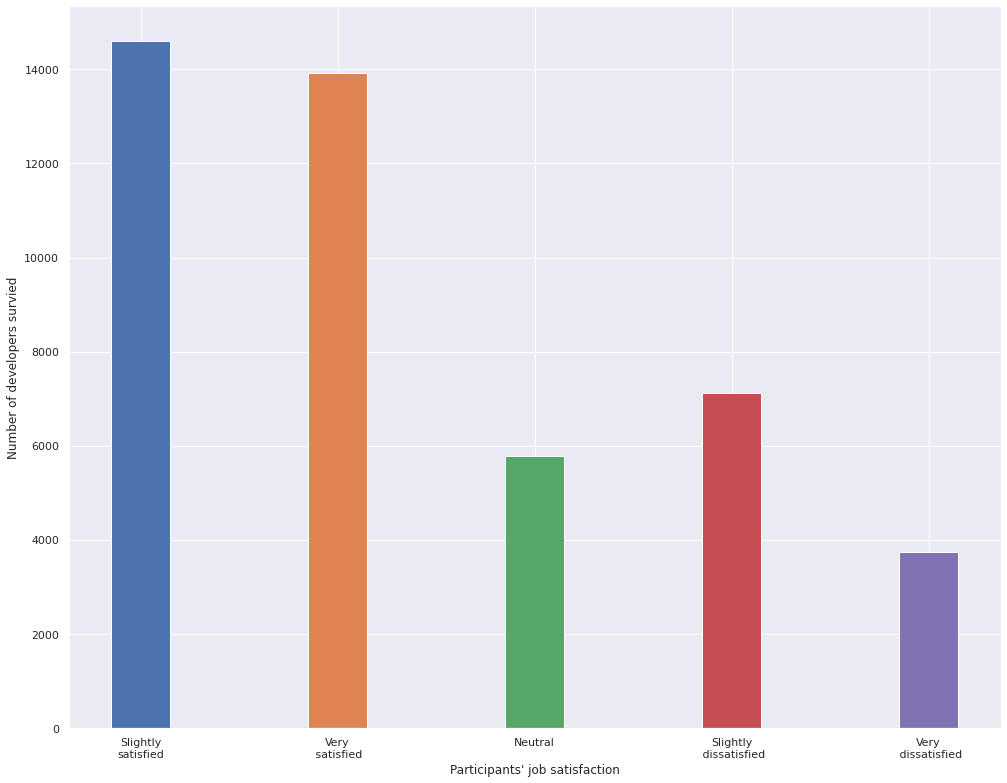

In [138]:
plt.figure()
plt.bar('Slightly\nsatisfied', v_satisfied, width=0.3)
plt.bar('Very\n satisfied', sl_satisfied, width=0.3)
plt.bar('Neutral', neutral, width=0.3)
plt.bar('Slightly\n dissatisfied', sl_dissatisfied, width=0.3)
plt.bar('Very\n dissatisfied', v_dissatisfied, width=0.3)
plt.ylabel('Number of developers survied')
plt.xlabel('Participants\' job satisfaction')
plt.show()

In [139]:
pd.options.display.max_colwidth = 100

In [140]:
jobSeek = pd.read_sql('SELECT distinct JobSeek FROM developer_survey', conn_sql)
jobSeek

,JobSeek
0,I am not interested in new job opportunities
1,None
2,"I’m not actively looking, but I am open to new opportunities"
3,I am actively looking for a job


In [141]:
developer_survey['JobSeek'] = developer_survey['JobSeek'].str.replace('\’','', regex=True) 

In [142]:
developer_survey.JobSeek

0                       I am not interested in new job opportunities
1                       I am not interested in new job opportunities
2                                                               None
3        Im not actively looking, but I am open to new opportunities
4                                                               None
                                    ...                             
64456                                                           None
64457                                                           None
64458                                                           None
64459                                                           None
64460                                                           None
Name: JobSeek, Length: 64461, dtype: object

In [143]:
#Plotting the dispersion of answers for seeking new job
not_interested = (developer_survey.JobSeek=='I am not interested in new job opportunities').sum()
not_actively_looking = (developer_survey.JobSeek=='Im not actively looking, but I am open to new opportunities').sum()
actively_looking = (developer_survey.JobSeek=='I am actively looking for a job').sum()

print("Not interested: %d" % not_interested)
print("Not actively looking: %d" % not_actively_looking)
print("Actively looking: %d" % actively_looking)

Not interested: 13001
Not actively looking: 29776
Actively looking: 8950


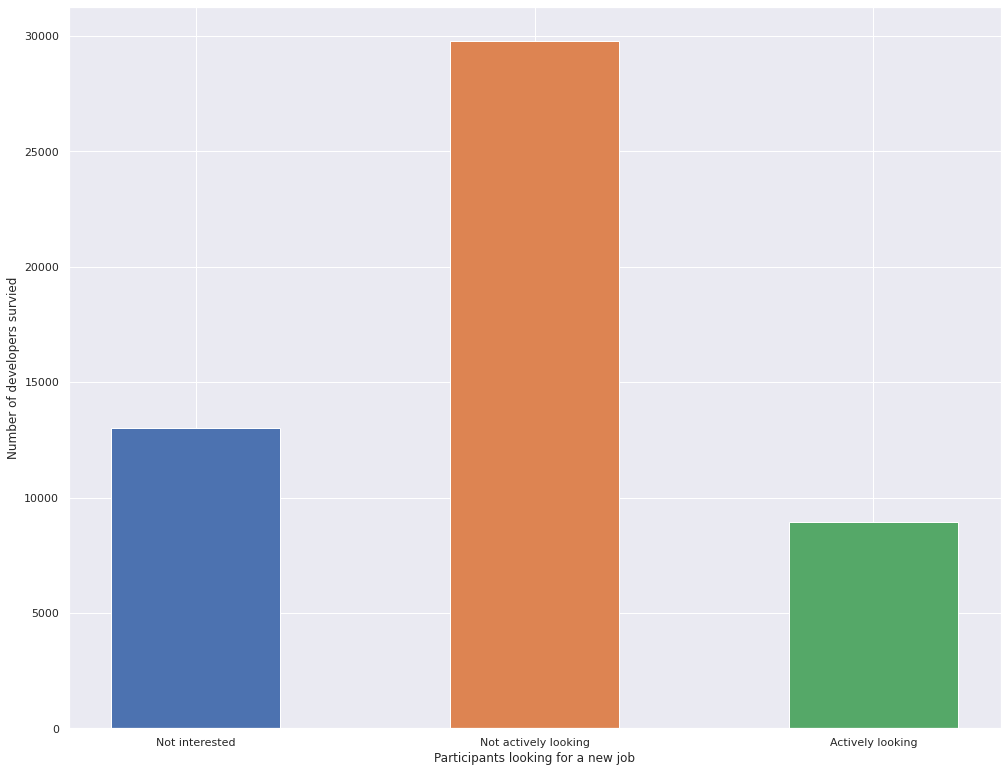

In [144]:
plt.figure()
plt.bar('Not interested', not_interested, width=0.5)
plt.bar('Not actively looking', not_actively_looking, width=0.5)
plt.bar('Actively looking', actively_looking, width=0.5)
plt.ylabel('Number of developers survied')
plt.xlabel('Participants looking for a new job')
plt.show()

In [145]:
conn_sql = sqlite.connect('MasterAll.db')
developer_survey.to_sql('developer_survey_cl', con=conn_sql, if_exists='replace', index=False)

#reload the inserted data from where we will drop values
developer_survey_cl = pd.read_sql('SELECT * FROM developer_survey_cl', conn_sql)
#we will use this df to change nan values with mean
developer_survey_cl_si = pd.read_sql('SELECT * FROM developer_survey_cl', conn_sql)

In [146]:
developer_survey_cl.to_csv("dbs/developer_survey/developer_survey_cl.csv", index=False)

In [147]:
#we first remove the rows that contain null values in JobSat column as that is our target value
developer_survey_cl.dropna(subset=['JobSat', 'ConvertedComp', 'JobSeek', 'Age', 'Age1stCode', 'WorkWeekHrs', 'YearsCode', 'YearsCodePro'], inplace=True)
developer_survey_cl_si.dropna(subset=['JobSat', 'ConvertedComp', 'JobSeek'], inplace=True)


In [158]:
developer_survey_cl.isnull().sum()

MainBranch               0
Hobbyist                 0
Age                      0
Age1stCode               0
ConvertedComp            0
DevType                306
EdLevel                471
Employment              30
Gender                 313
JobFactors             464
JobSat                   0
JobSeek                  0
NEWDevOps              218
NEWDevOpsImpt          726
NEWEdImpt              333
NEWJobHunt            1061
NEWJobHuntResearch    1637
NEWLearn               794
NEWOnboardGood         221
NEWOvertime             58
OpSys                  200
OrgSize                417
PurchaseWhat          2704
UndergradMajor        2162
WorkWeekHrs              0
YearsCode                0
YearsCodePro             0
dtype: int64

In [159]:
developer_survey_cl_si.isnull().sum()

MainBranch               0
Hobbyist                 0
Age                   3167
Age1stCode              77
ConvertedComp            0
DevType                362
EdLevel                535
Employment              34
Gender                1642
JobFactors             700
JobSat                   0
JobSeek                  0
NEWDevOps              304
NEWDevOpsImpt          897
NEWEdImpt              458
NEWJobHunt            1281
NEWJobHuntResearch    2018
NEWLearn              1202
NEWOnboardGood         310
NEWOvertime            106
OpSys                  794
OrgSize                503
PurchaseWhat          3661
UndergradMajor        2437
WorkWeekHrs            733
YearsCode              115
YearsCodePro           117
dtype: int64

In [150]:
developer_survey_cl.dtypes

MainBranch             object
Hobbyist               object
Age                   float64
Age1stCode            float64
ConvertedComp         float64
DevType                object
EdLevel                object
Employment             object
Gender                 object
JobFactors             object
JobSat                 object
JobSeek                object
NEWDevOps              object
NEWDevOpsImpt          object
NEWEdImpt              object
NEWJobHunt             object
NEWJobHuntResearch     object
NEWLearn               object
NEWOnboardGood         object
NEWOvertime            object
OpSys                  object
OrgSize                object
PurchaseWhat           object
UndergradMajor         object
WorkWeekHrs           float64
YearsCode             float64
YearsCodePro          float64
dtype: object

In [151]:
sl_satisfied = (developer_survey_cl.JobSat=='Slightly satisfied').sum()
v_dissatisfied = (developer_survey_cl.JobSat=='Very dissatisfied').sum()
sl_dissatisfied = (developer_survey_cl.JobSat=='Slightly dissatisfied').sum()
v_satisfied = (developer_survey_cl.JobSat=='Very satisfied').sum()
neutral = (developer_survey_cl.JobSat=='Neither satisfied nor dissatisfied').sum()

print("Very satisfied: %d" % v_satisfied)
print("Slightly satisfied: %d" % sl_satisfied)
print("Neutral: %d" % neutral)
print("Slightly dissatisfied: %d" % sl_dissatisfied)
print("Very dissatisfied: %d" % v_dissatisfied)

Very satisfied: 9886
Slightly satisfied: 9284
Neutral: 3370
Slightly dissatisfied: 4938
Very dissatisfied: 2387


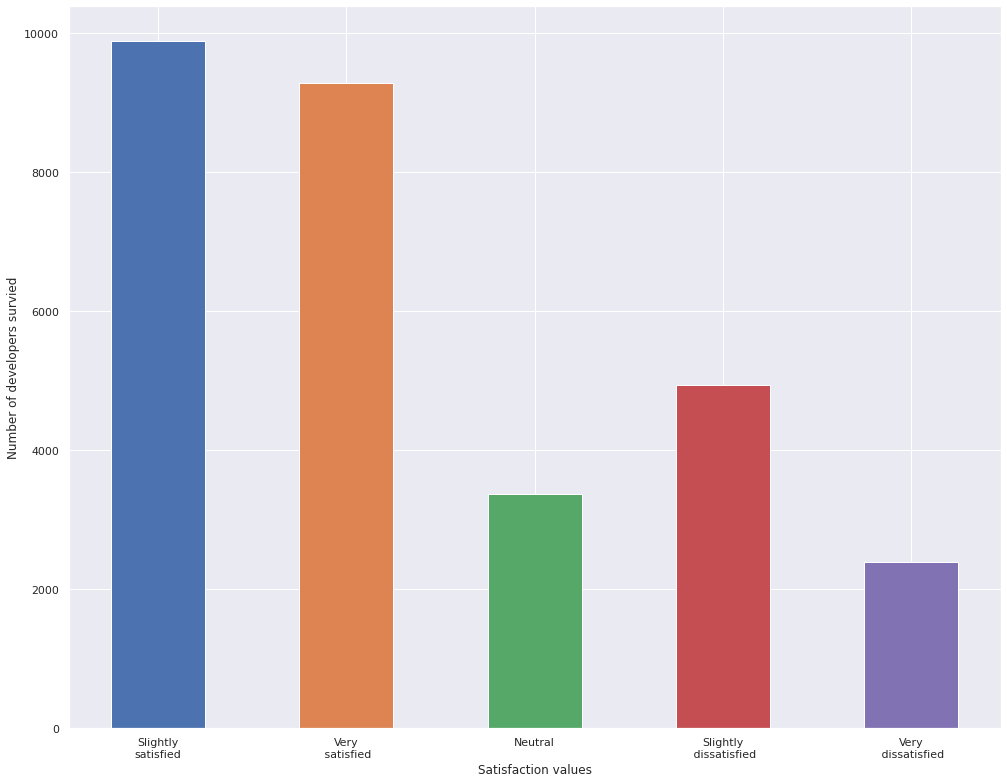

In [152]:
plt.figure()
plt.bar('Slightly\nsatisfied', v_satisfied, width=0.5)
plt.bar('Very\n satisfied', sl_satisfied, width=0.5)
plt.bar('Neutral', neutral, width=0.5)
plt.bar('Slightly\n dissatisfied', sl_dissatisfied, width=0.5)
plt.bar('Very\n dissatisfied', v_dissatisfied, width=0.5)
plt.ylabel('Number of developers survied')
plt.xlabel('Satisfaction values')
plt.show()

In [155]:
#Plotting the dispersion of answers for seeking new job
not_interested = (developer_survey_cl.JobSeek=='I am not interested in new job opportunities').sum()
not_actively_looking = (developer_survey_cl.JobSeek=='Im not actively looking, but I am open to new opportunities').sum()
actively_looking = (developer_survey_cl.JobSeek=='I am actively looking for a job').sum()

print("Not interested: %d" % not_interested)
print("Not actively looking: %d" % not_actively_looking)
print("Actively looking: %d" % actively_looking)

Not interested: 8383
Not actively looking: 17691
Actively looking: 3791


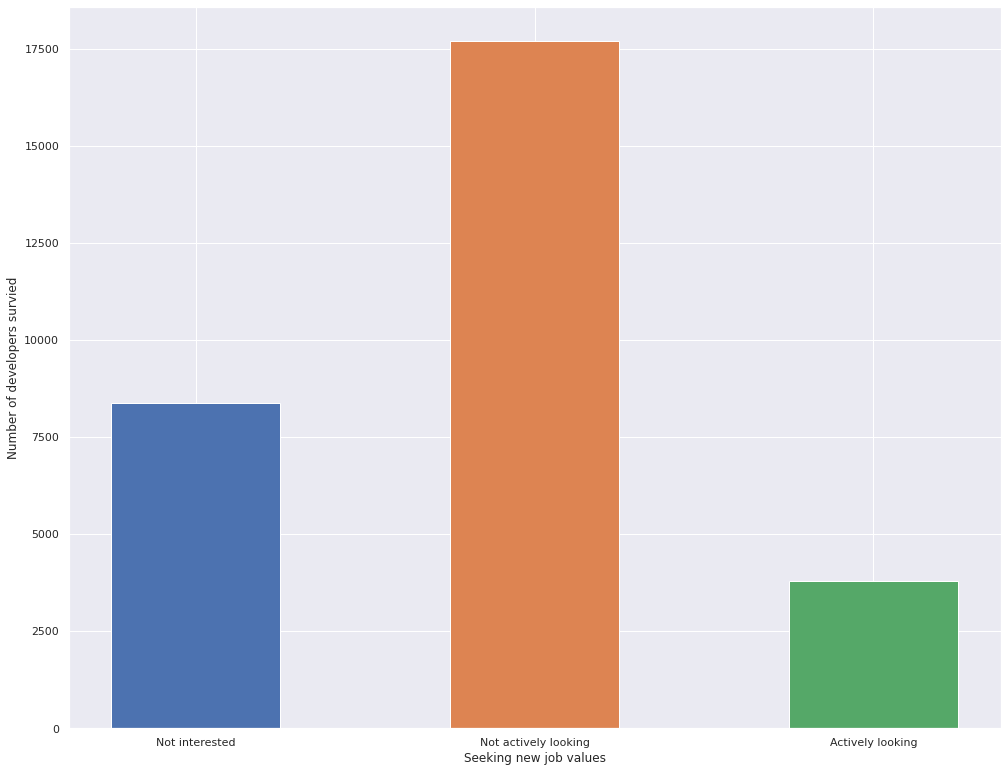

In [156]:
plt.figure()
plt.bar('Not interested', not_interested, width=0.5)
plt.bar('Not actively looking', not_actively_looking, width=0.5)
plt.bar('Actively looking', actively_looking, width=0.5)
plt.ylabel('Number of developers survied')
plt.xlabel('Seeking new job values')
plt.show()

In [51]:
#as 'Age', 'Age1stCode', 'WorkWeekHrs', 'YearsCode', 'YearsCodePro' contain float values we'll exchange the ones missing with the mean value of the column with SimpleImputer

from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
developer_survey_cl_si[['Age', 'Age1stCode', 'WorkWeekHrs', 'YearsCode', 'YearsCodePro' ]] = imputer.fit_transform(developer_survey_cl_si[['Age', 'Age1stCode', 'WorkWeekHrs', 'YearsCode', 'YearsCodePro']])

In [52]:
conn_sql = sqlite.connect('MasterAll.db')

developer_survey_cl.to_sql('developer_survey_cl2', con=conn_sql, if_exists='replace', index=False)
developer_survey_cl2 = pd.read_sql('SELECT * FROM developer_survey_cl2', conn_sql)

developer_survey_cl_si.to_sql('developer_survey_cl_si', con=conn_sql, if_exists='replace', index=False)
developer_survey_cl_si = pd.read_sql('SELECT * FROM developer_survey_cl_si', conn_sql)

In [53]:
developer_survey_cl2.to_csv("dbs/developer_survey/developer_survey_cl2.csv", index=False)
developer_survey_cl_si.to_csv("dbs/developer_survey/developer_survey_cl_si.csv", index=False)

In [90]:
#shape and dimension of dataframe developer_survey
print('Shape: ', developer_survey_cl_si.shape)
print('Shape: ', developer_survey_cl.shape)

Shape:  (33730, 27)
Shape:  (29865, 27)


In [91]:
developer_survey_cl2.isnull().sum()

MainBranch               0
Hobbyist                 0
Age                      0
Age1stCode               0
ConvertedComp            0
DevType                306
EdLevel                471
Employment              30
Gender                 313
JobFactors             464
JobSat                   0
JobSeek                  0
NEWDevOps              218
NEWDevOpsImpt          726
NEWEdImpt              333
NEWJobHunt            1061
NEWJobHuntResearch    1637
NEWLearn               794
NEWOnboardGood         221
NEWOvertime             58
OpSys                  200
OrgSize                417
PurchaseWhat          2704
UndergradMajor        2162
WorkWeekHrs              0
YearsCode                0
YearsCodePro             0
dtype: int64

In [92]:
developer_survey_cl_si.isnull().sum()

MainBranch               0
Hobbyist                 0
Age                      0
Age1stCode               0
ConvertedComp            0
DevType                362
EdLevel                535
Employment              34
Gender                1642
JobFactors             700
JobSat                   0
JobSeek                  0
NEWDevOps              304
NEWDevOpsImpt          897
NEWEdImpt              458
NEWJobHunt            1281
NEWJobHuntResearch    2018
NEWLearn              1202
NEWOnboardGood         310
NEWOvertime            106
OpSys                  794
OrgSize                503
PurchaseWhat          3661
UndergradMajor        2437
WorkWeekHrs              0
YearsCode                0
YearsCodePro             0
dtype: int64

In [93]:
developer_survey_cl_si.head()

,MainBranch,Hobbyist,Age,Age1stCode,ConvertedComp,DevType,EdLevel,Employment,Gender,JobFactors,...,NEWLearn,NEWOnboardGood,NEWOvertime,OpSys,OrgSize,PurchaseWhat,UndergradMajor,WorkWeekHrs,YearsCode,YearsCodePro
0,I am a developer by profession,Yes,36.0,12.0,116000.0,"Developer, back-end;Developer, desktop or enterprise applications;Developer, game or graphics","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Man,Remote work options;Opportunities for professional development;Family friendliness,...,Once a year,Yes,Occasionally: 1-2 days per quarter but less than monthly,Linux-based,20 to 99 employees,I have some influence,"Computer science, computer engineering, or software engineering",39.0,17.0,13.0
1,I am a developer by profession,Yes,22.0,14.0,32315.0,"Database administrator;Developer, full-stack;Developer, mobile","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,Man,Flex time or a flexible schedule;How widely used or impactful my work output would be;Opportunit...,...,Every few months,Onboarding? What onboarding?,Often: 1-2 days per week or more,Windows,2 to 9 employees,I have a great deal of influence,Mathematics or statistics,36.0,8.0,4.0
2,I am a developer by profession,Yes,23.0,13.0,40070.0,"Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applicatio...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Man,"Flex time or a flexible schedule;Languages, frameworks, and other technologies I’d be working wi...",...,Every few months,Yes,Rarely: 1-2 days per year or less,Windows,"10,000 or more employees",I have little or no influence,"Computer science, computer engineering, or software engineering",40.0,10.0,2.0
3,I am a developer by profession,No,49.0,42.0,14268.0,"Designer;Developer, front-end",Some college/university study without earning a degree,Employed full-time,Man,Remote work options;Office environment or company culture;Family friendliness,...,Once every few years,No,Rarely: 1-2 days per year or less,Windows,2 to 9 employees,I have little or no influence,Mathematics or statistics,40.0,7.0,7.0
4,"I am not primarily a developer, but I write code sometimes as part of my work",Yes,53.0,14.0,38916.0,"Designer;Developer, back-end","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",Employed full-time,Man,Industry that I’d be working in;Financial performance or funding status of the company or organi...,...,Once every few years,Yes,Rarely: 1-2 days per year or less,MacOS,2 to 9 employees,I have some influence,None,36.0,35.0,20.0


In [94]:
#we are dropping columns that had multiple choice answers, and resulted in big character lengths per row which increased the db size as well
developer_survey_cl2 = developer_survey_cl2.drop(['NEWJobHunt', 'NEWJobHuntResearch', 'JobFactors', 'DevType'], axis=1)
developer_survey_cl_si = developer_survey_cl_si.drop(['NEWJobHunt', 'NEWJobHuntResearch', 'JobFactors', 'DevType'], axis=1)

In [95]:
developer_survey_cl2.to_csv("dbs/developer_survey/developer_survey_cl3.csv", index=False)
developer_survey_cl_si.to_csv("dbs/developer_survey/developer_survey_cl_si2.csv", index=False)

In [96]:
developer_survey_cl2.isnull().sum()

MainBranch           0
Hobbyist             0
Age                  0
Age1stCode           0
ConvertedComp        0
EdLevel            471
Employment          30
Gender             313
JobSat               0
JobSeek              0
NEWDevOps          218
NEWDevOpsImpt      726
NEWEdImpt          333
NEWLearn           794
NEWOnboardGood     221
NEWOvertime         58
OpSys              200
OrgSize            417
PurchaseWhat      2704
UndergradMajor    2162
WorkWeekHrs          0
YearsCode            0
YearsCodePro         0
dtype: int64

In [97]:
developer_survey_cl_si.isnull().sum()

MainBranch           0
Hobbyist             0
Age                  0
Age1stCode           0
ConvertedComp        0
EdLevel            535
Employment          34
Gender            1642
JobSat               0
JobSeek              0
NEWDevOps          304
NEWDevOpsImpt      897
NEWEdImpt          458
NEWLearn          1202
NEWOnboardGood     310
NEWOvertime        106
OpSys              794
OrgSize            503
PurchaseWhat      3661
UndergradMajor    2437
WorkWeekHrs          0
YearsCode            0
YearsCodePro         0
dtype: int64

In [61]:
developer_survey_cl_si.dtypes

MainBranch         object
Hobbyist           object
Age               float64
Age1stCode        float64
ConvertedComp     float64
EdLevel            object
Employment         object
Gender             object
JobSat             object
JobSeek            object
NEWDevOps          object
NEWDevOpsImpt      object
NEWEdImpt          object
NEWLearn           object
NEWOnboardGood     object
NEWOvertime        object
OpSys              object
OrgSize            object
PurchaseWhat       object
UndergradMajor     object
WorkWeekHrs       float64
YearsCode         float64
YearsCodePro      float64
dtype: object

In [77]:
#save data as is with all NaN vals removed before categorical transform to reuse the data
conn_sql = sqlite.connect('MasterAll.db')

developer_survey_cl2.to_sql('developer_survey_le', con=conn_sql, if_exists='replace', index=False)
developer_survey_le = pd.read_sql('SELECT * FROM developer_survey_le', conn_sql)

developer_survey_cl_si.to_sql('developer_survey_le_si', con=conn_sql, if_exists='replace', index=False)
developer_survey_le_si = pd.read_sql('SELECT * FROM developer_survey_le_si', conn_sql)

In [78]:
developer_survey_le.columns

Index(['MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'ConvertedComp',
       'EdLevel', 'Employment', 'Gender', 'JobSat', 'JobSeek', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWLearn', 'NEWOnboardGood',
       'NEWOvertime', 'OpSys', 'OrgSize', 'PurchaseWhat', 'UndergradMajor',
       'WorkWeekHrs', 'YearsCode', 'YearsCodePro'],
      dtype='object')

In [79]:
#Some columns need to be changed to integer columns as scikit is used only with integers with LabelEncoder

from sklearn.preprocessing import LabelEncoder
categorical_features_d = ['MainBranch', 'Hobbyist', 'EdLevel', 'Employment',
        'Gender', 'JobSat','JobSeek', 'NEWDevOps', 'NEWDevOpsImpt', 'NEWEdImpt', 'NEWLearn', 
        'NEWOnboardGood', 'NEWOvertime', 'OpSys', 'OrgSize', 'PurchaseWhat', 'UndergradMajor']
le = LabelEncoder()

for i in range(len(categorical_features_d)):
    new = le.fit_transform(developer_survey_le[categorical_features_d[i]])
    new2 = le.fit_transform(developer_survey_le_si[categorical_features_d[i]])
    developer_survey_le[categorical_features_d[i]] = new
    developer_survey_le_si[categorical_features_d[i]] = new2

developer_survey_le_si.head(5) 

,MainBranch,Hobbyist,Age,Age1stCode,ConvertedComp,EdLevel,Employment,Gender,JobSat,JobSeek,...,NEWLearn,NEWOnboardGood,NEWOvertime,OpSys,OrgSize,PurchaseWhat,UndergradMajor,WorkWeekHrs,YearsCode,YearsCodePro
0,0,1,36.0,12.0,116000.0,1,0,0,1,2,...,2,2,1,1,5,2,6,39.0,17.0,13.0
1,0,1,22.0,14.0,32315.0,3,0,0,4,2,...,0,1,2,3,4,0,10,36.0,8.0,4.0
2,0,1,23.0,13.0,40070.0,1,0,0,1,0,...,0,2,3,3,2,1,6,40.0,10.0,2.0
3,0,0,49.0,42.0,14268.0,8,0,0,3,2,...,3,0,3,3,4,1,10,40.0,7.0,7.0
4,1,1,53.0,14.0,38916.0,7,0,0,4,1,...,3,2,3,2,4,2,12,36.0,35.0,20.0


In [80]:
#shape 
print('Shape: ', developer_survey_le.shape)
print('Shape: ', developer_survey_le_si.shape)

Shape:  (29865, 23)
Shape:  (33730, 23)


In [81]:
developer_survey_le.isnull().sum()

MainBranch        0
Hobbyist          0
Age               0
Age1stCode        0
ConvertedComp     0
EdLevel           0
Employment        0
Gender            0
JobSat            0
JobSeek           0
NEWDevOps         0
NEWDevOpsImpt     0
NEWEdImpt         0
NEWLearn          0
NEWOnboardGood    0
NEWOvertime       0
OpSys             0
OrgSize           0
PurchaseWhat      0
UndergradMajor    0
WorkWeekHrs       0
YearsCode         0
YearsCodePro      0
dtype: int64

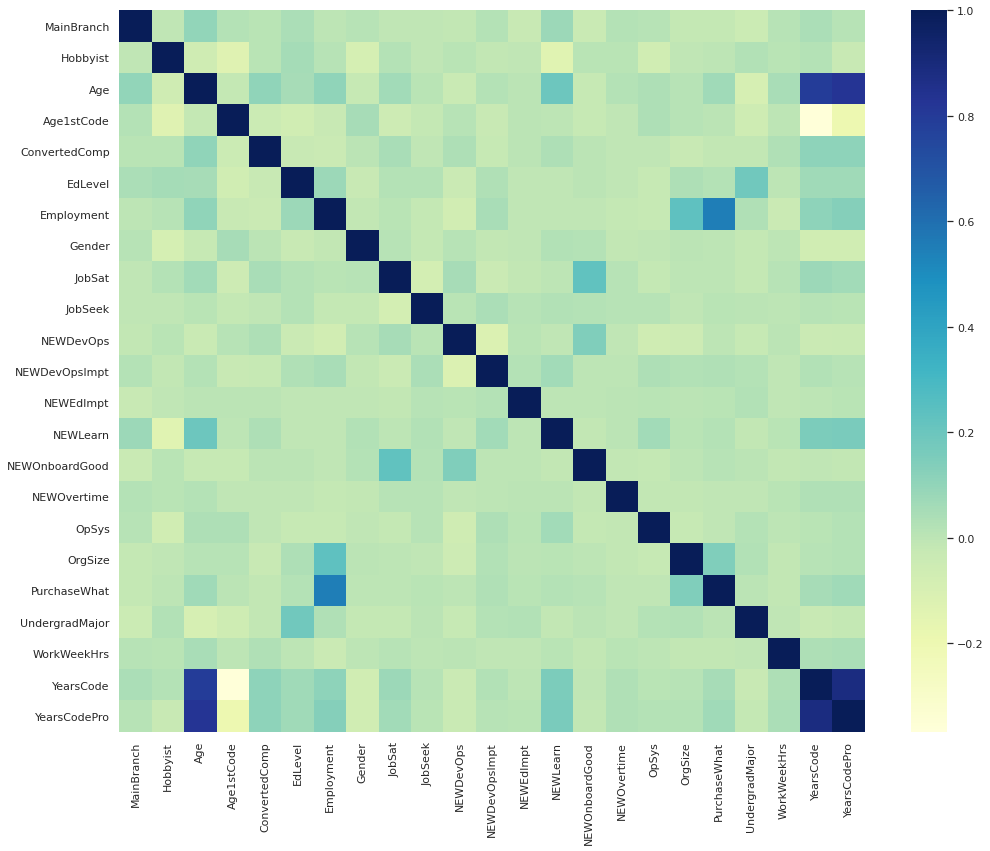

In [82]:
#visualizing the data
%matplotlib inline
import seaborn as sns

sns.set(rc={'figure.figsize':(16.7,13.27)})
correlations = developer_survey_le.corr()
sns.heatmap(correlations, cmap="YlGnBu")
plt.show()

In [83]:
X_seek = developer_survey_le[['MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'ConvertedComp', 'EdLevel', 'Employment', 
    'Gender', 'JobSat', 'NEWDevOps', 'NEWDevOpsImpt', 'NEWEdImpt', 'NEWLearn', 'NEWOnboardGood', 'NEWOvertime',
    'OpSys', 'OrgSize', 'PurchaseWhat', 'UndergradMajor', 'WorkWeekHrs', 'YearsCode', 'YearsCodePro']]
y_seek = developer_survey_le['JobSeek']

from sklearn.model_selection import train_test_split

test_size = 0.3
seed = 1345
x_seek_train, x_seek_test, y_seek_train, y_seek_test = train_test_split(X_seek, y_seek, test_size=test_size, random_state=seed)

In [84]:
X_sseek = developer_survey_le_si[['MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'ConvertedComp', 'EdLevel', 'Employment', 
    'Gender', 'JobSat', 'NEWDevOps', 'NEWDevOpsImpt', 'NEWEdImpt', 'NEWLearn', 'NEWOnboardGood', 'NEWOvertime',
    'OpSys', 'OrgSize', 'PurchaseWhat', 'UndergradMajor', 'WorkWeekHrs', 'YearsCode', 'YearsCodePro']]
y_sseek = developer_survey_le_si['JobSeek']

from sklearn.model_selection import train_test_split

test_size = 0.3
seed = 1345
x_sseek_train, x_sseek_test, y_sseek_train, y_sseek_test = train_test_split(X_sseek, y_sseek, test_size=test_size, random_state=seed)

In [85]:
X = developer_survey_le[['MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'ConvertedComp', 'EdLevel', 'Employment', 
    'Gender', 'JobSeek', 'NEWDevOps', 'NEWDevOpsImpt', 'NEWEdImpt', 'NEWLearn', 'NEWOnboardGood', 'NEWOvertime',
    'OpSys', 'OrgSize', 'PurchaseWhat', 'UndergradMajor', 'WorkWeekHrs', 'YearsCode', 'YearsCodePro']]
y = developer_survey_le['JobSat']

from sklearn.model_selection import train_test_split

test_size = 0.3
seed = 1345
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [86]:
X_si = developer_survey_le_si[['MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'ConvertedComp', 'EdLevel', 'Employment', 
    'Gender', 'JobSat', 'NEWDevOps', 'NEWDevOpsImpt', 'NEWEdImpt', 'NEWLearn', 'NEWOnboardGood', 'NEWOvertime',
    'OpSys', 'OrgSize', 'PurchaseWhat', 'UndergradMajor', 'WorkWeekHrs', 'YearsCode', 'YearsCodePro']]
y_si = developer_survey_le_si['JobSat']

from sklearn.model_selection import train_test_split

test_size = 0.3
seed = 1345
x_sitrain, x_sitest, y_sitrain, y_sitest = train_test_split(X_si, y_si, test_size=test_size, random_state=seed)

In [87]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report
import time

In [61]:
start_time_lr_sat = time.time()
#lr = LogisticRegression(penalty='none', solver='saga').fit(x_train, y_train)
lr = LogisticRegression().fit(x_train, y_train)
predictions_lr_sat = lr.predict(x_test)
elapsed_time_lr_sat = time.time() - start_time_lr_sat

print(f"LogisticRegression JobSat: \n time: %.3f" % elapsed_time_lr_sat)
print(classification_report(y_test, predictions_lr_sat))

start_time_lr_sat_si = time.time()
#lr = LogisticRegression(penalty='none', solver='saga').fit(x_train, y_train)
lr = LogisticRegression().fit(x_sitrain, y_sitrain)
predictions_lr_sat_si = lr.predict(x_sitest)
elapsed_time_lr_sat_si = time.time() - start_time_lr_sat_si

print(f"LogisticRegression JobSat_si: \n time: %.3f" % elapsed_time_lr_sat_si)
print(classification_report(y_sitest, predictions_lr_sat_si))

LogisticRegression JobSat: 
 time: 0.565
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1041
           1       0.00      0.00      0.00      1460
           2       0.00      0.00      0.00      2781
           3       0.00      0.00      0.00       701
           4       0.33      1.00      0.50      2977

    accuracy                           0.33      8960
   macro avg       0.07      0.20      0.10      8960
weighted avg       0.11      0.33      0.17      8960



/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

LogisticRegression JobSat_si: 
 time: 0.750
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1159
           1       0.00      0.00      0.00      1747
           2       0.00      0.00      0.00      3074
           3       0.00      0.00      0.00       826
           4       0.33      1.00      0.49      3313

    accuracy                           0.33     10119
   macro avg       0.07      0.20      0.10     10119
weighted avg       0.11      0.33      0.16     10119



/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [62]:
start_time_lr_seek = time.time()
#lr = LogisticRegression(penalty='none', solver='saga').fit(x_train, y_train)
lr = LogisticRegression().fit(x_seek_train, y_seek_train)
predictions_lr_seek = lr.predict(x_seek_test)
elapsed_time_lr_seek = time.time() - start_time_lr_seek

print(f"LogisticRegression JobSeek: \n time: %.3f" % elapsed_time_lr_seek)
print(classification_report(y_seek_test, predictions_lr_seek))

start_time_lr_sseek = time.time()
#lr = LogisticRegression(penalty='none', solver='saga').fit(x_train, y_train)
lr = LogisticRegression().fit(x_sseek_train, y_sseek_train)
predictions_lr_sseek = lr.predict(x_sseek_test)
elapsed_time_lr_sseek = time.time() - start_time_lr_sseek

print(f"LogisticRegression JobSeek_si: \n time: %.3f" % elapsed_time_lr_sseek)
print(classification_report(y_sseek_test, predictions_lr_sseek))

LogisticRegression JobSeek: 
 time: 0.676
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1168
           1       0.29      0.01      0.01      2512
           2       0.59      0.99      0.74      5280

    accuracy                           0.59      8960
   macro avg       0.29      0.33      0.25      8960
weighted avg       0.43      0.59      0.44      8960



/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

LogisticRegression JobSeek_si: 
 time: 0.652
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1325
           1       0.34      0.01      0.02      2815
           2       0.59      0.99      0.74      5979

    accuracy                           0.59     10119
   macro avg       0.31      0.33      0.25     10119
weighted avg       0.45      0.59      0.44     10119



/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [63]:
start_time_nb_sat = time.time()
nb = GaussianNB().fit(x_train, y_train)
predictions_nb_sat = nb.predict(x_test)
elapsed_time_nb_sat = time.time() - start_time_nb_sat

print("GaussianNB JobSat: \n time: %.3f" % elapsed_time_nb_sat)
print(classification_report(y_test, predictions_nb_sat))

start_time_nb_sat_si = time.time()
nb = GaussianNB().fit(x_sitrain, y_sitrain)
predictions_nb_sat_si = nb.predict(x_sitest)
elapsed_time_nb_sat_si = time.time() - start_time_nb_sat_si

print("GaussianNB JobSat_si: \n time: %.3f" % elapsed_time_nb_sat_si)
print(classification_report(y_sitest, predictions_nb_sat_si))

GaussianNB JobSat: 
 time: 0.036
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1041
           1       0.08      0.00      0.00      1460
           2       0.32      0.77      0.45      2781
           3       0.00      0.00      0.00       701
           4       0.39      0.28      0.33      2977

    accuracy                           0.33      8960
   macro avg       0.16      0.21      0.16      8960
weighted avg       0.24      0.33      0.25      8960

GaussianNB JobSat_si: 
 time: 0.036
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1159
           1       0.13      0.00      0.01      1747
           2       0.31      0.79      0.45      3074
           3       0.00      0.00      0.00       826
           4       0.42      0.29      0.34      3313

    accuracy                           0.34     10119
   macro avg       0.17      0.22      0.16     10119
weighted

/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [64]:
start_time_nb_seek = time.time()
nb = GaussianNB().fit(x_seek_train, y_seek_train)
predictions_nb_seek = nb.predict(x_seek_test)
elapsed_time_nb_seek = time.time() - start_time_nb_seek

print("GaussianNB JobSeek: \n time: %.3f" % elapsed_time_nb_seek)
print(classification_report(y_seek_test, predictions_nb_seek))

start_time_nb_sseek = time.time()
nb = GaussianNB().fit(x_sseek_train, y_sseek_train)
predictions_nb_sseek = nb.predict(x_sseek_test)
elapsed_time_nb_sseek = time.time() - start_time_nb_sseek

print("GaussianNB JobSeek_si: \n time: %.3f" % elapsed_time_nb_sseek)
print(classification_report(y_sseek_test, predictions_nb_sseek))

GaussianNB JobSeek: 
 time: 0.027
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1168
           1       0.38      0.09      0.14      2512
           2       0.59      0.94      0.73      5280

    accuracy                           0.58      8960
   macro avg       0.32      0.34      0.29      8960
weighted avg       0.46      0.58      0.47      8960

GaussianNB JobSeek_si: 
 time: 0.028
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1325
           1       0.37      0.07      0.12      2815
           2       0.59      0.95      0.73      5979

    accuracy                           0.58     10119
   macro avg       0.32      0.34      0.28     10119
weighted avg       0.45      0.58      0.47     10119



/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [65]:
start_time_svc_sat = time.time()
#svc = LinearSVC(loss='hinge', max_iter=5000).fit(x_train, y_train)
svc = LinearSVC().fit(x_train, y_train)
predictions_svc_sat = svc.predict(x_test)
elapsed_time_svc_sat = time.time() - start_time_svc_sat

print("LinearSVC JobSat: \n time: %.3f" % elapsed_time_svc_sat)
print(classification_report(y_test, predictions_svc_sat))

start_time_svc_sat_si = time.time()
#svc = LinearSVC(loss='hinge', max_iter=5000).fit(x_train, y_train)
svc = LinearSVC().fit(x_sitrain, y_sitrain)
predictions_svc_sat_si = svc.predict(x_sitest)
elapsed_time_svc_sat_si = time.time() - start_time_svc_sat_si

print("LinearSVC JobSat_si: \n time: %.3f" % elapsed_time_svc_sat_si)
print(classification_report(y_sitest, predictions_svc_sat_si))

/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC JobSat: 
 time: 26.674
              precision    recall  f1-score   support

           0       0.18      0.03      0.06      1041
           1       0.16      0.02      0.03      1460
           2       0.28      0.09      0.13      2781
           3       0.08      0.36      0.13       701
           4       0.32      0.51      0.39      2977

    accuracy                           0.23      8960
   macro avg       0.20      0.20      0.15      8960
weighted avg       0.25      0.23      0.19      8960

LinearSVC JobSat_si: 
 time: 35.929
              precision    recall  f1-score   support

           0       0.93      0.52      0.66      1159
           1       0.35      0.78      0.49      1747
           2       0.55      0.08      0.14      3074
           3       0.17      0.14      0.15       826
           4       0.73      0.97      0.83      3313

    accuracy                           0.55     10119
   macro avg       0.54      0.50      0.46     10119
weighted

/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [66]:
start_time_svc_seek = time.time()
#svc = LinearSVC(loss='hinge', max_iter=5000).fit(x_train, y_train)
svc = LinearSVC().fit(x_seek_train, y_seek_train)
predictions_svc_seek = svc.predict(x_seek_test)
elapsed_time_svc_seek = time.time() - start_time_svc_seek

print("LinearSVC JobSeek: \n time: %.3f" % elapsed_time_svc_seek)
print(classification_report(y_seek_test, predictions_svc_seek))

start_time_svc_sseek = time.time()
#svc = LinearSVC(loss='hinge', max_iter=5000).fit(x_train, y_train)
svc = LinearSVC().fit(x_sseek_train, y_sseek_train)
predictions_svc_sseek = svc.predict(x_sseek_test)
elapsed_time_svc_sseek = time.time() - start_time_svc_sseek

print("LinearSVC JobSeek_si: \n time: %.3f" % elapsed_time_svc_sseek)
print(classification_report(y_sseek_test, predictions_svc_sseek))

/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC JobSeek: 
 time: 19.009
              precision    recall  f1-score   support

           0       0.17      0.31      0.22      1168
           1       0.32      0.16      0.22      2512
           2       0.58      0.61      0.59      5280

    accuracy                           0.44      8960
   macro avg       0.35      0.36      0.34      8960
weighted avg       0.45      0.44      0.44      8960

LinearSVC JobSeek_si: 
 time: 21.896
              precision    recall  f1-score   support

           0       0.32      0.03      0.05      1325
           1       0.31      0.94      0.47      2815
           2       0.65      0.17      0.27      5979

    accuracy                           0.36     10119
   macro avg       0.43      0.38      0.26     10119
weighted avg       0.51      0.36      0.29     10119



/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [ ]:
start_time_knn_sat = time.time()
#knn = KNeighborsClassifier(n_neighbors=15, weights='distance', algorithm='kd_tree').fit(x_train, y_train)
knn = KNeighborsClassifier().fit(x_train, y_train)
predictions_knn_sat = knn.predict(x_test)
elapsed_time_knn_sat = time.time() - start_time_knn_sat

print("KNeighborsClassifier JobSat: \n time: %.3f" % elapsed_time_knn_sat)
print(classification_report(y_test, predictions_knn_sat))

start_time_knn_sat_si = time.time()
#knn = KNeighborsClassifier(n_neighbors=15, weights='distance', algorithm='kd_tree').fit(x_train, y_train)
knn = KNeighborsClassifier().fit(x_sitrain, y_sitrain)
predictions_knn_sat_si = knn.predict(x_sitest)
elapsed_time_knn_sat_si = time.time() - start_time_knn_sat_si

print("KNeighborsClassifier JobSat_si: \n time: %.3f" % elapsed_time_knn_sat_si)
print(classification_report(y_sitest, predictions_knn_sat_si))

In [12]:
start_time_knn_seek = time.time()
#knn = KNeighborsClassifier(n_neighbors=15, weights='distance', algorithm='kd_tree').fit(x_train, y_train)
knn = KNeighborsClassifier().fit(x_seek_train, y_seek_train)
predictions_knn_seek = knn.predict(x_seek_test)
elapsed_time_knn_seek = time.time() - start_time_knn_seek

print("KNeighborsClassifier JobSeek: \n time: %.3f" % elapsed_time_knn_seek)
print(classification_report(y_seek_test, predictions_knn_seek))

start_time_knn_sseek = time.time()
#knn = KNeighborsClassifier(n_neighbors=15, weights='distance', algorithm='kd_tree').fit(x_train, y_train)
knn = KNeighborsClassifier().fit(x_sseek_train, y_sseek_train)
predictions_knn_sseek = knn.predict(x_sseek_test)
elapsed_time_knn_sseek = time.time() - start_time_knn_sseek

print("KNeighborsClassifier JobSeek_si: \n time: %.3f" % elapsed_time_knn_sseek)
print(classification_report(y_sseek_test, predictions_knn_sseek))

DecisionTreeClassifier: 
 time: 0.301
              precision    recall  f1-score   support

           0       0.15      0.15      0.15      1041
           1       0.24      0.25      0.24      1460
           2       0.34      0.35      0.35      2781
           3       0.14      0.16      0.15       701
           4       0.48      0.45      0.46      2977

    accuracy                           0.33      8960
   macro avg       0.27      0.27      0.27      8960
weighted avg       0.33      0.33      0.33      8960



In [67]:
start_time_dtc_sat = time.time()
#dtc = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=15).fit(x_train, y_train)
dtc = DecisionTreeClassifier().fit(x_train, y_train)
predictions_dtc_sat = dtc.predict(x_test)
elapsed_time_dtc_sat = time.time() - start_time_dtc_sat
print("DecisionTreeClassifier JobSat: \n time: %.3f" % elapsed_time_dtc_sat)
print(classification_report(y_test, predictions_dtc_sat))

start_time_dtc_sat_si = time.time()
#dtc = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=15).fit(x_train, y_train)
dtc = DecisionTreeClassifier().fit(x_sitrain, y_sitrain)
predictions_dtc_sat_si = dtc.predict(x_sitest)
elapsed_time_dtc_sat_si = time.time() - start_time_dtc_sat_si
print("DecisionTreeClassifier JobSat_si: \n time: %.3f" % elapsed_time_dtc_sat_si)
print(classification_report(y_sitest, predictions_dtc_sat_si))

DecisionTreeClassifier JobSat: 
 time: 0.380
              precision    recall  f1-score   support

           0       0.16      0.17      0.17      1041
           1       0.22      0.24      0.23      1460
           2       0.34      0.33      0.34      2781
           3       0.12      0.13      0.12       701
           4       0.46      0.44      0.45      2977

    accuracy                           0.32      8960
   macro avg       0.26      0.26      0.26      8960
weighted avg       0.32      0.32      0.32      8960

DecisionTreeClassifier JobSat_si: 
 time: 0.069
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1159
           1       1.00      1.00      1.00      1747
           2       1.00      1.00      1.00      3074
           3       1.00      1.00      1.00       826
           4       1.00      1.00      1.00      3313

    accuracy                           1.00     10119
   macro avg       1.00      1.00     

In [75]:
start_time_dtc_seek = time.time()
#dtc = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=15).fit(x_train, y_train)
dtc = DecisionTreeClassifier().fit(x_seek_train, y_seek_train)
predictions_dtc_seek = dtc.predict(x_seek_test)
elapsed_time_dtc_seek = time.time() - start_time_dtc_seek

print("DecisionTreeClassifier JobSeek: \n time: %.3f" % elapsed_time_dtc_seek)
print(classification_report(y_seek_test, predictions_dtc_seek))

start_time_dtc_sseek = time.time()
#dtc = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=15).fit(x_train, y_train)
dtc = DecisionTreeClassifier().fit(x_sseek_train, y_sseek_train)
predictions_dtc_sseek = dtc.predict(x_sseek_test)
elapsed_time_dtc_sseek = time.time() - start_time_dtc_sseek
print("DecisionTreeClassifier JobSeek_si: \n time: %.3f" % elapsed_time_dtc_sseek)
print(classification_report(y_sseek_test, predictions_dtc_sseek))

DecisionTreeClassifier JobSeek: 
 time: 0.374
              precision    recall  f1-score   support

           0       0.26      0.26      0.26      1168
           1       0.41      0.42      0.42      2512
           2       0.63      0.61      0.62      5280

    accuracy                           0.51      8960
   macro avg       0.43      0.43      0.43      8960
weighted avg       0.52      0.51      0.52      8960

DecisionTreeClassifier JobSeek_si: 
 time: 0.405
              precision    recall  f1-score   support

           0       0.25      0.26      0.26      1325
           1       0.41      0.42      0.41      2815
           2       0.62      0.61      0.61      5979

    accuracy                           0.51     10119
   macro avg       0.43      0.43      0.43     10119
weighted avg       0.51      0.51      0.51     10119



In [69]:
start_time_rfc_sat = time.time()
#rfc = RandomForestClassifier(n_estimators=500, max_depth=30, random_state=2, bootstrap=False).fit(x_train, y_train)
rfc = RandomForestClassifier().fit(x_train, y_train)
predictions_rfc_sat = rfc.predict(x_test)
elapsed_time_rfc_sat = time.time() - start_time_rfc_sat

print("RandomForestClassifier JobSat: \n time: %.3f" % elapsed_time_rfc_sat)
print(classification_report(y_test, predictions_rfc_sat))

start_time_rfc_sat_si = time.time()
#rfc = RandomForestClassifier(n_estimators=500, max_depth=30, random_state=2, bootstrap=False).fit(x_train, y_train)
rfc = RandomForestClassifier().fit(x_sitrain, y_sitrain)
predictions_rfc_sat_si = rfc.predict(x_sitest)
elapsed_time_rfc_sat_si = time.time() - start_time_rfc_sat_si

print("RandomForestClassifier JobSat_si: \n time: %.3f" % elapsed_time_rfc_sat_si)
print(classification_report(y_sitest, predictions_rfc_sat_si))

RandomForestClassifier JobSat: 
 time: 6.124
              precision    recall  f1-score   support

           0       0.22      0.03      0.06      1041
           1       0.33      0.25      0.28      1460
           2       0.37      0.54      0.44      2781
           3       0.27      0.05      0.08       701
           4       0.53      0.63      0.57      2977

    accuracy                           0.42      8960
   macro avg       0.34      0.30      0.29      8960
weighted avg       0.39      0.42      0.39      8960

RandomForestClassifier JobSat_si: 
 time: 4.284
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1159
           1       1.00      1.00      1.00      1747
           2       1.00      1.00      1.00      3074
           3       1.00      1.00      1.00       826
           4       1.00      1.00      1.00      3313

    accuracy                           1.00     10119
   macro avg       1.00      1.00     

In [77]:
start_time_rfc_seek = time.time()
#rfc = RandomForestClassifier(n_estimators=500, max_depth=30, random_state=2, bootstrap=False).fit(x_train, y_train)
rfc = RandomForestClassifier().fit(x_seek_train, y_seek_train)
predictions_rfc_seek = rfc.predict(x_seek_test)
elapsed_time_rfc_seek = time.time() - start_time_rfc_seek

print("RandomForestClassifier JobSeek: \n time: %.3f" % elapsed_time_rfc_seek)
print(classification_report(y_seek_test, predictions_rfc_seek))

start_time_rfc_sseek = time.time()
#rfc = RandomForestClassifier(n_estimators=500, max_depth=30, random_state=2, bootstrap=False).fit(x_train, y_train)
rfc = RandomForestClassifier().fit(x_sseek_train, y_sseek_train)
predictions_rfc_sseek = rfc.predict(x_sseek_test)
elapsed_time_rfc_sseek = time.time() - start_time_rfc_sseek

print("RandomForestClassifier JobSeek_si: \n time: %.3f" % elapsed_time_rfc_sseek)
print(classification_report(y_sseek_test, predictions_rfc_sseek))

RandomForestClassifier JobSeek: 
 time: 7.258
              precision    recall  f1-score   support

           0       0.65      0.08      0.15      1168
           1       0.57      0.44      0.49      2512
           2       0.65      0.84      0.73      5280

    accuracy                           0.63      8960
   macro avg       0.62      0.46      0.46      8960
weighted avg       0.63      0.63      0.59      8960

RandomForestClassifier JobSeek_si: 
 time: 6.467
              precision    recall  f1-score   support

           0       0.52      0.08      0.14      1325
           1       0.59      0.43      0.50      2815
           2       0.65      0.85      0.74      5979

    accuracy                           0.64     10119
   macro avg       0.59      0.46      0.46     10119
weighted avg       0.62      0.64      0.59     10119



In [70]:
start_time_gbc_sat = time.time()
#gbc = GradientBoostingClassifier(loss='exponential', max_depth=5, learning_rate=0.4, n_estimators=150).fit(x_train, y_train)
gbc = GradientBoostingClassifier().fit(x_train, y_train)
predictions_gbc_sat = gbc.predict(x_test)
elapsed_time_gbc_sat = time.time() - start_time_gbc_sat

print("GradientBoostingClassifier JobSat: \n time: %.3f" % elapsed_time_gbc_sat)
print(classification_report(y_test, predictions_gbc_sat))

start_time_gbc_sat_si = time.time()
#gbc = GradientBoostingClassifier(loss='exponential', max_depth=5, learning_rate=0.4, n_estimators=150).fit(x_train, y_train)
gbc = GradientBoostingClassifier().fit(x_sitrain, y_sitrain)
predictions_gbc_sat_si = gbc.predict(x_sitest)
elapsed_time_gbc_sat_si = time.time() - start_time_gbc_sat_si

print("GradientBoostingClassifier JobSat_si: \n time: %.3f" % elapsed_time_gbc_sat_si)
print(classification_report(y_sitest, predictions_gbc_sat_si))

GradientBoostingClassifier JobSat: 
 time: 30.962
              precision    recall  f1-score   support

           0       0.24      0.02      0.03      1041
           1       0.36      0.23      0.28      1460
           2       0.38      0.61      0.47      2781
           3       0.30      0.05      0.08       701
           4       0.56      0.62      0.59      2977

    accuracy                           0.44      8960
   macro avg       0.37      0.31      0.29      8960
weighted avg       0.42      0.44      0.40      8960

GradientBoostingClassifier JobSat_si: 
 time: 31.537
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1159
           1       1.00      1.00      1.00      1747
           2       1.00      1.00      1.00      3074
           3       1.00      1.00      1.00       826
           4       1.00      1.00      1.00      3313

    accuracy                           1.00     10119
   macro avg       1.00     

In [72]:
start_time_gbc_seek = time.time()
gbc = GradientBoostingClassifier(max_depth=15, learning_rate=0.7).fit(x_seek_train, y_seek_train)
#gbc = GradientBoostingClassifier().fit(x_train, y_train)
predictions_gbc_seek = gbc.predict(x_seek_test)
elapsed_time_gbc_seek = time.time() - start_time_gbc_seek

print("GradientBoostingClassifier JobSeek: \n time: %.3f" % elapsed_time_gbc_seek)
print(classification_report(y_seek_test, predictions_gbc_seek))

start_time_gbc_sseek = time.time()
#gbc = GradientBoostingClassifier(loss='exponential', max_depth=5, learning_rate=0.4, n_estimators=150).fit(x_train, y_train)
gbc = GradientBoostingClassifier().fit(x_sseek_train, y_sseek_train)
predictions_gbc_sseek = gbc.predict(x_sseek_test)
elapsed_time_gbc_sseek = time.time() - start_time_gbc_sseek

print("GradientBoostingClassifier JobSeek_si: \n time: %.3f" % elapsed_time_gbc_sseek)
print(classification_report(y_sseek_test, predictions_gbc_sseek))

GradientBoostingClassifier JobSeek: 
 time: 165.802
              precision    recall  f1-score   support

           0       0.54      0.09      0.16      1168
           1       0.56      0.41      0.48      2512
           2       0.65      0.84      0.73      5280

    accuracy                           0.63      8960
   macro avg       0.58      0.45      0.46      8960
weighted avg       0.61      0.63      0.59      8960

GradientBoostingClassifier JobSeek_si: 
 time: 20.061
              precision    recall  f1-score   support

           0       0.51      0.11      0.18      1325
           1       0.60      0.48      0.53      2815
           2       0.66      0.84      0.74      5979

    accuracy                           0.64     10119
   macro avg       0.59      0.47      0.48     10119
weighted avg       0.62      0.64      0.61     10119



## With nan values exchanged with data missing

In [88]:
start_time_lr_sat = time.time()
#lr = LogisticRegression(penalty='none', solver='saga').fit(x_train, y_train)
lr = LogisticRegression().fit(x_train, y_train)
predictions_lr_sat = lr.predict(x_test)
elapsed_time_lr_sat = time.time() - start_time_lr_sat

print(f"LogisticRegression JobSat: \n time: %.3f" % elapsed_time_lr_sat)
print(classification_report(y_test, predictions_lr_sat))

start_time_lr_sat_si = time.time()
#lr = LogisticRegression(penalty='none', solver='saga').fit(x_train, y_train)
lr = LogisticRegression().fit(x_sitrain, y_sitrain)
predictions_lr_sat_si = lr.predict(x_sitest)
elapsed_time_lr_sat_si = time.time() - start_time_lr_sat_si

print(f"LogisticRegression JobSat_si: \n time: %.3f" % elapsed_time_lr_sat_si)
print(classification_report(y_sitest, predictions_lr_sat_si))

LogisticRegression JobSat: 
 time: 2.172
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1041
           1       0.00      0.00      0.00      1460
           2       0.00      0.00      0.00      2781
           3       0.00      0.00      0.00       701
           4       0.33      1.00      0.50      2977

    accuracy                           0.33      8960
   macro avg       0.07      0.20      0.10      8960
weighted avg       0.11      0.33      0.17      8960



/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

LogisticRegression JobSat_si: 
 time: 1.240
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1159
           1       0.00      0.00      0.00      1747
           2       0.00      0.00      0.00      3074
           3       0.00      0.00      0.00       826
           4       0.33      1.00      0.49      3313

    accuracy                           0.33     10119
   macro avg       0.07      0.20      0.10     10119
weighted avg       0.11      0.33      0.16     10119



/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vanda/Projects/jupyter_notes/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [ ]:
start_time_lr_seek = time.time()
#lr = LogisticRegression(penalty='none', solver='saga').fit(x_train, y_train)
lr = LogisticRegression().fit(x_seek_train, y_seek_train)
predictions_lr_seek = lr.predict(x_seek_test)
elapsed_time_lr_seek = time.time() - start_time_lr_seek

print(f"LogisticRegression JobSeek: \n time: %.3f" % elapsed_time_lr_seek)
print(classification_report(y_seek_test, predictions_lr_seek))

start_time_lr_sseek = time.time()
#lr = LogisticRegression(penalty='none', solver='saga').fit(x_train, y_train)
lr = LogisticRegression().fit(x_sseek_train, y_sseek_train)
predictions_lr_sseek = lr.predict(x_sseek_test)
elapsed_time_lr_sseek = time.time() - start_time_lr_sseek

print(f"LogisticRegression JobSeek_si: \n time: %.3f" % elapsed_time_lr_sseek)
print(classification_report(y_sseek_test, predictions_lr_sseek))

In [ ]:
start_time_lr_seek = time.time()
#lr = LogisticRegression(penalty='none', solver='saga').fit(x_train, y_train)
lr = LogisticRegression().fit(x_seek_train, y_seek_train)
predictions_lr_seek = lr.predict(x_seek_test)
elapsed_time_lr_seek = time.time() - start_time_lr_seek

print(f"LogisticRegression JobSeek: \n time: %.3f" % elapsed_time_lr_seek)
print(classification_report(y_seek_test, predictions_lr_seek))

start_time_lr_sseek = time.time()
#lr = LogisticRegression(penalty='none', solver='saga').fit(x_train, y_train)
lr = LogisticRegression().fit(x_sseek_train, y_sseek_train)
predictions_lr_sseek = lr.predict(x_sseek_test)
elapsed_time_lr_sseek = time.time() - start_time_lr_sseek

print(f"LogisticRegression JobSeek_si: \n time: %.3f" % elapsed_time_lr_sseek)
print(classification_report(y_sseek_test, predictions_lr_sseek))

In [ ]:
start_time_nb_seek = time.time()
nb = GaussianNB().fit(x_seek_train, y_seek_train)
predictions_nb_seek = nb.predict(x_seek_test)
elapsed_time_nb_seek = time.time() - start_time_nb_seek

print("GaussianNB JobSeek: \n time: %.3f" % elapsed_time_nb_seek)
print(classification_report(y_seek_test, predictions_nb_seek))

start_time_nb_sseek = time.time()
nb = GaussianNB().fit(x_sseek_train, y_sseek_train)
predictions_nb_sseek = nb.predict(x_sseek_test)
elapsed_time_nb_sseek = time.time() - start_time_nb_sseek

print("GaussianNB JobSeek_si: \n time: %.3f" % elapsed_time_nb_sseek)
print(classification_report(y_sseek_test, predictions_nb_sseek))

In [ ]:
start_time_svc_sat = time.time()
#svc = LinearSVC(loss='hinge', max_iter=5000).fit(x_train, y_train)
svc = LinearSVC().fit(x_train, y_train)
predictions_svc_sat = svc.predict(x_test)
elapsed_time_svc_sat = time.time() - start_time_svc_sat

print("LinearSVC JobSat: \n time: %.3f" % elapsed_time_svc_sat)
print(classification_report(y_test, predictions_svc_sat))

start_time_svc_sat_si = time.time()
#svc = LinearSVC(loss='hinge', max_iter=5000).fit(x_train, y_train)
svc = LinearSVC().fit(x_sitrain, y_sitrain)
predictions_svc_sat_si = svc.predict(x_sitest)
elapsed_time_svc_sat_si = time.time() - start_time_svc_sat_si

print("LinearSVC JobSat_si: \n time: %.3f" % elapsed_time_svc_sat_si)
print(classification_report(y_sitest, predictions_svc_sat_si))